# **Phase 1 :Implementing the feature reduction algorithm(PCA)**

**Students:**

- *Sarah Alshumayri* - S20106125

- *Reema abdallah* - S20106463

- *Leen Sharab* - S21107195

**Instructor:** *Passent Elkafrawy*

Computer Science Department College of Engineering Effat University

---



# **Principal Component Analysis (PCA)**

**Principal Component Analysis (PCA)** is an unsupervised learning method used in machine learning and data analysis to reduce data dimensionality while retaining as much variance as possible.

> It generates new variables, called principal components, from linear combinations of the original variables, with each component capturing progressively less variation.


> The **aim** is to simplify the data to its most informative features, aiding in visualization and noise reduction, particularly in datasets with numerous, potentially correlated features.

> It is useful when dealing with high-dimensional datasets where the number of features is large. It can be used for various applications such as image processing, speech recognition, and data compression.






##**Why Use PCA?**



> **1.** To eliminate correlated features from a dataset, thereby simplifying it and enhancing machine learning model performance by removing redundancy.

> **2.** To facilitate the visualization of high-dimensional data in a lower-dimensional space, making it easier to identify patterns and relationships within the data.






##**How PCA Works**


PCA works by computing the covariance matrix of the data and then finding the eigenvectors and eigenvalues of this matrix. The **eigenvectors** represent the directions in which the data varies the most, while the **eigenvalues** represent the amount of variance explained by each eigenvector.

The first principal component is the direction with the highest variance, and each subsequent principal component is orthogonal to the previous ones and captures as much of the remaining variance as possible. By projecting the data onto these principal components, we can reduce its dimensionality while retaining most of its variability.



# **Data Pre-Processing**

##**Import Libraries**

In [6]:
# Importing all libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler


ModuleNotFoundError: No module named 'pandas'

##**Load and Clean the data**

> Performing data preprocessing on a sleep health and lifestyle dataset for analysis or modeling by first removing duplicates, then encoding categorical variables, excluding specific columns. Splits the data into training and testing subsets, and normalizes these subsets, making the dataset ready for machine learning analysis or modeling.

In [ ]:
# Loading the dataset
sleep_data = pd.read_csv('/content/sample_data/Sleep_health_and_lifestyle_dataset.csv')


# Step 1: Remove duplicate entries
sleep_data = sleep_data.drop_duplicates()

# Step 2: One-hot encode categorical variables directly within the dataframe
features = pd.get_dummies(sleep_data.drop(['Person ID', 'Sleep Disorder'], axis=1), drop_first=True)
target = sleep_data['Sleep Disorder']

# Step 3: Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 4: Normalize the features
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Tne dataset is now cleaned and ready for analysis or modeling


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/Sleep_health_and_lifestyle_dataset.csv'

# **Data Visualization**

##**Age Distribution by sleep disorder**
> Visualizing analyzes the distribution of ages within different sleep disorder categories by creating a stacked histogram, with each stack representing a category of sleep disorder, facilitating insights into how age distribution varies by sleep disorder status.


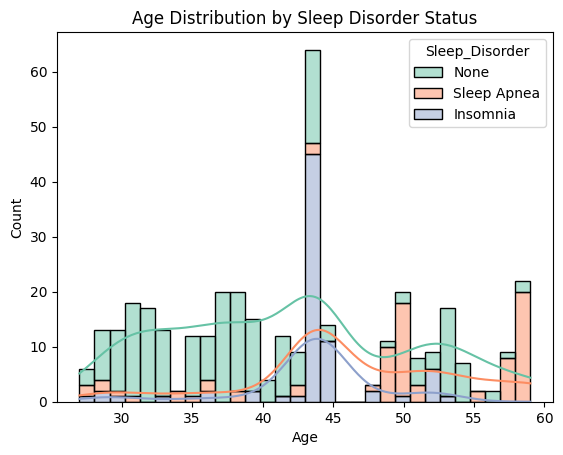

In [ ]:
# Adding the target to the features for plotting
plot_data = features.assign(Sleep_Disorder=target)

# Plot the distribution of 'Age' for each category of 'Sleep Disorder'
sns.histplot(data=plot_data, x='Age', hue='Sleep_Disorder', multiple='stack', palette='Set2', bins=30, kde=True)
plt.title('Age Distribution by Sleep Disorder Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


##**Distribution of Sleep Disorders Across Gender Categories**
>Creating a stacked histogram to display the distribution of sleep disorders across gender categories. It stacks sleep disorder statuses for each gender in the dataset sleep_data. The sns.histplot function is configured to stack the categories for visual comparison, with a shrinkage factor applied for aesthetics.

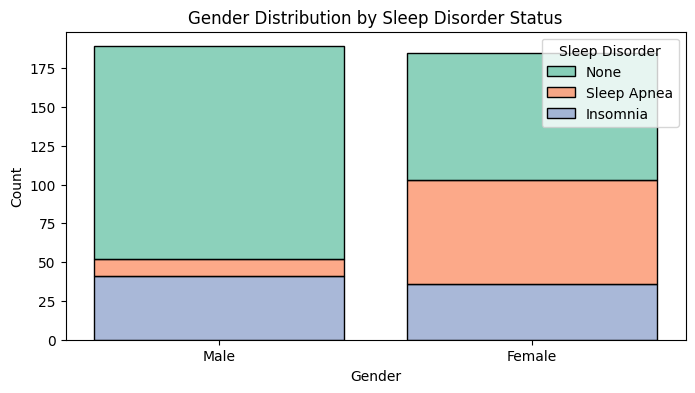

In [ ]:
plot_data = sleep_data[['Gender', 'Sleep Disorder']]

# Creating the histogram plot
plt.figure(figsize=(8, 4))
sns.histplot(data=plot_data, x='Gender', hue='Sleep Disorder', multiple='stack', palette='Set2', shrink=0.8)
plt.title('Gender Distribution by Sleep Disorder Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


##**BMI Distribution by Sleep Disorder**

>Produceing a bar chart showing the count of each BMI Category in the dataset, providing a visual representation of the distribution of sleep disorders and BMI categories among the participants.

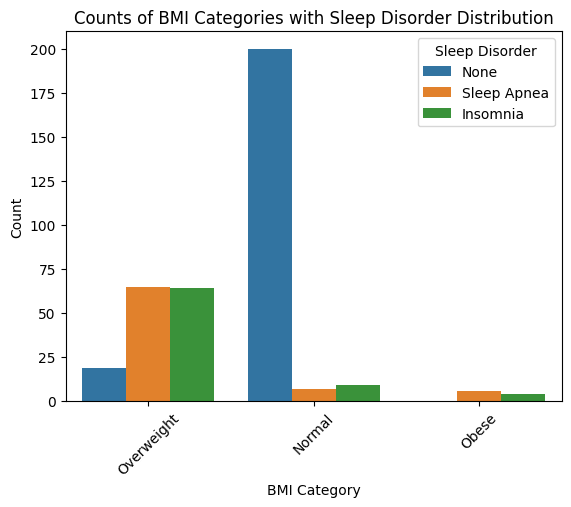

In [ ]:
plot_data = sleep_data[['BMI Category', 'Sleep Disorder']]

# Creating a bar chart for the counts of the BMI Category with the distribution of the target 'Sleep Disorder'

sns.countplot(data=plot_data, x='BMI Category', hue='Sleep Disorder')
plt.title('Counts of BMI Categories with Sleep Disorder Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Sleep Disorder', loc='upper right')  # Place legend in the upper right corner of the plot
plt.show()


##**Sleep Duration and Quality of Sleep**



>Generateing a scatter plot to visualize the relationship between sleep duration and the quality of sleep, using cleaned data, with points semi-transparently plotted to indicate any potential correlation between the two variables.

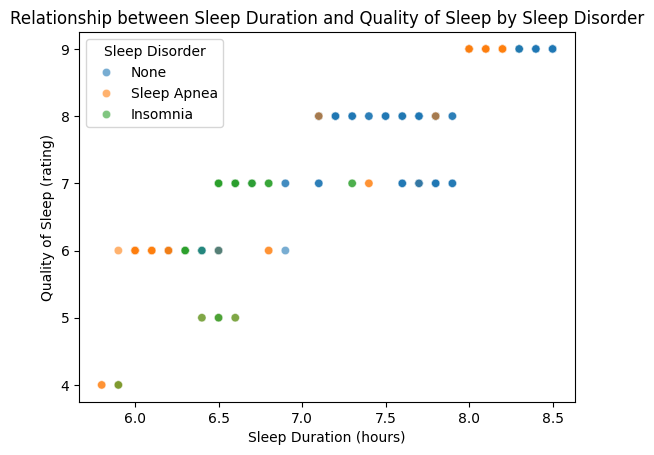

In [ ]:
# Creating a scatter plot of Sleep Duration vs. Quality of Sleep, colored by the target 'Sleep Disorder'
sns.scatterplot(data=sleep_data, x='Sleep Duration', y='Quality of Sleep', hue='Sleep Disorder', alpha=0.6)
plt.title('Relationship between Sleep Duration and Quality of Sleep by Sleep Disorder')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quality of Sleep (rating)')
plt.legend(title='Sleep Disorder')
plt.show()


##**Correlation Heatmap**

>Createing a heatmap to display the correlation coefficients between numerical variables in the `sleep_data` dataset, using a color spectrum to visually represent the strength and direction of the correlations among these variables.

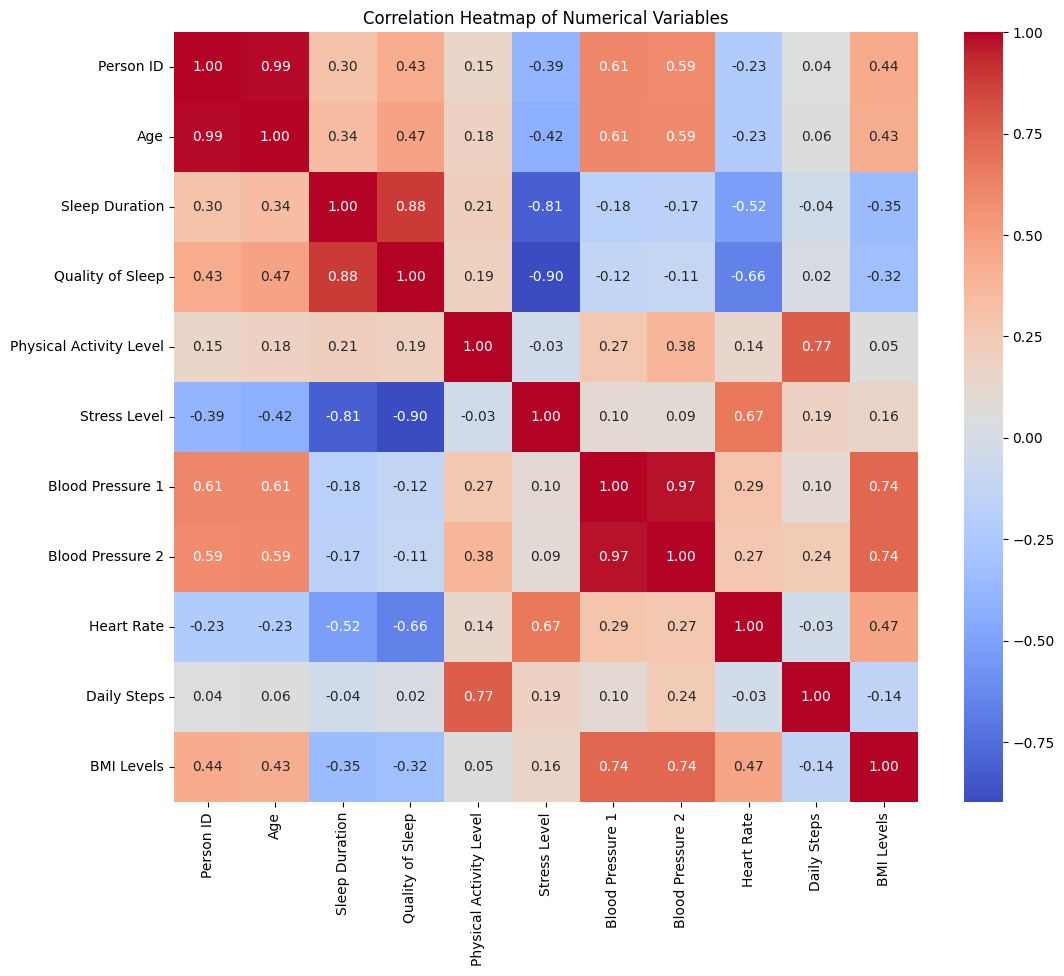

In [ ]:
# First, we need to identify the numerical columns in the sleep_data DataFrame. We'll exclude any categorical columns.
numerical_columns = sleep_data.select_dtypes(include=['float64', 'int64']).columns

# Now, let's create the correlation heatmap for these numerical variables.
plt.figure(figsize=(12, 10))
correlation_matrix = sleep_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()




---


#**PCA Algorithm Code Implementation**


##**Transforming Scaled Features into Principal Component**


>We're setting up Principal Component Analysis (PCA) with 7 components to transform our scaled training features into principal components. Next, we create a DataFrame to store these components, assigning specific names to each column, from 'Principal Component 1' through 'Principal Component 7'. Finally, we display the first few rows of this DataFrame to ensure everything is in order.






In [ ]:
# Apply PCA to the scaled features with 7 components
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(features_train_scaled)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7']
)

# Display the first few rows to confirm
print(principalDf.head())


   Principal Component 1  Principal Component 2  Principal Component 3  \
0               1.638758               2.093871               1.483460   
1              -1.246718               3.541751               0.603907   
2              -2.328228               0.596527              -1.300765   
3               2.532640              -3.698775              -0.478142   
4               1.161310               2.219446               0.486823   

   Principal Component 4  Principal Component 5  Principal Component 6  \
0              -0.694458               2.828381              -1.335554   
1              -0.150390              -0.692332              -0.340528   
2              -0.254710              -0.074935               0.285570   
3               0.532361              -0.188724              -0.329090   
4               0.117442              -1.448327              -0.854843   

   Principal Component 7  
0              -0.596706  
1              -0.777637  
2               0.256386  
3 

##**Merging Principal Components with Target Variable**

>This code converts the target training series into a DataFrame and reset its index to ensure alignment for concatenation with the DataFrame of principal components, thus creating a final DataFrame that combines both the features and the target variable.


In [ ]:
# Since 'target' is a Series, we need to convert it to a DataFrame and ensure it has the right index to concatenate
target_df = pd.DataFrame(target_train).reset_index(drop=True)

# Concatenate the principal components with the target variable
# Here it's important to reset the index to avoid issues during concatenation
finalDf = pd.concat([principalDf, target_df], axis=1)


##**Visualizing Relationships Between Principal Components**



>Creating scatter plots for each combination of the  seven principal components, assigning different colors to each category of the target variable "Sleep Disorder". It arranges the plots in a 3x3 grid, adjusting for visibility and readability, and hides any unused subplot areas, providing a comprehensive visual exploration of the relationships between components.

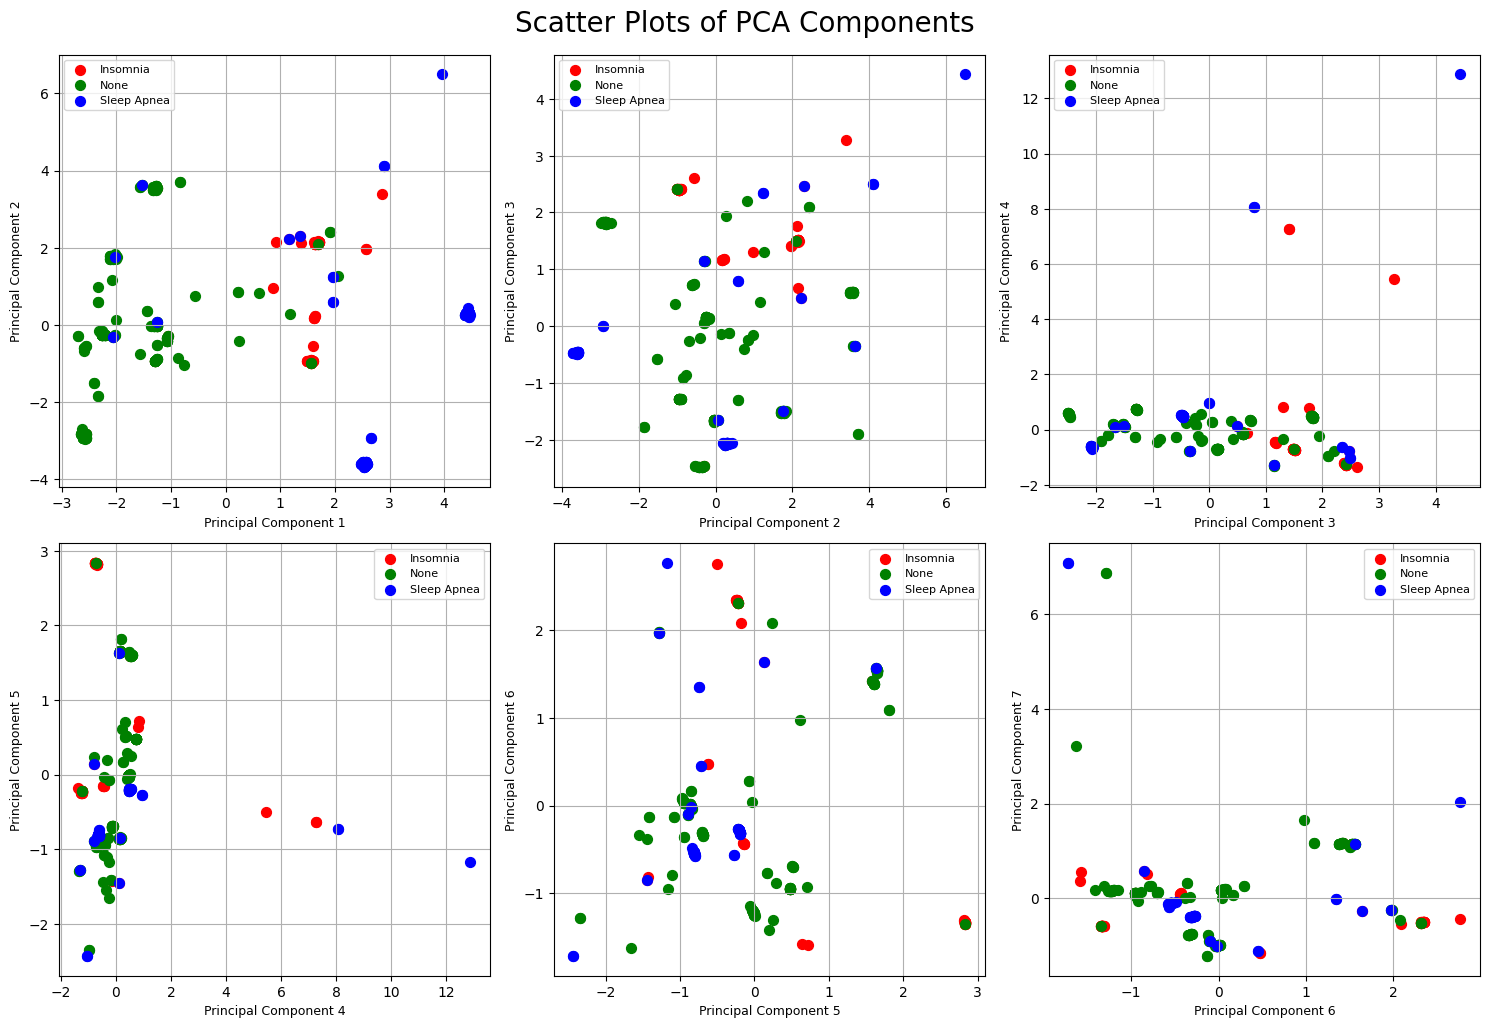

In [ ]:
# we create scatter plots for each combination of principal components.

# Generate scatter plots for each pair of principal components
fig, axes = plt.subplots(3, 3, figsize=(15,15))  # Adjust subplots count as needed
axes = axes.ravel()
principal_columns = principalDf.columns
target_column = 'Sleep Disorder'
targets = finalDf[target_column].unique()
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Color list for different targets

# Generate plots for each pair of components
for i, ax in enumerate(axes):
    for target, color in zip(targets, colors):
        if i < len(principal_columns) - 1:  # Avoid index out of range for the last subplot
            # Find indices to keep for each target
            indicesToKeep = finalDf[target_column] == target
            # Scatter plot between i-th and i+1-th principal component
            ax.scatter(finalDf.loc[indicesToKeep, principal_columns[i]],
                       finalDf.loc[indicesToKeep, principal_columns[i+1]],
                       c=color, s=50, label=str(target))
            ax.set_xlabel(principal_columns[i], fontsize=9)
            ax.set_ylabel(principal_columns[i+1], fontsize=9)
            ax.legend(targets, fontsize=8)
            ax.grid()
        else:
            ax.set_visible(False)  # Hide unused subplots

plt.suptitle('Scatter Plots of PCA Components', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust layout to give space for suptitle
plt.show()


#**Compute Covariance Matrix**

>Calculating the covariance matrix of the scaled training features by transposing the feature matrix before computation, providing a basis to understand the variance and correlation between different features.

In [ ]:
cov_matrix = np.cov(features_train_scaled.T)


### **1. Compute Eigenvectors And Eigenvalues**



>We computed the eigenvalues and eigenvectors of the covariance matrix of the scaled training features, essential for understanding the variance explained by each principal component in PCA

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)


### **2. Sort Eigenvalues In Descending Order**


>We sorted the eigenvalues and their corresponding eigenvectors in descending order, ensuring that the principal components are ordered by their significance in explaining the variance of the data

In [ ]:

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]


### **3. Choose Principal Components**


> In this step we selected the first seven eigenvectors based on their sorted significance, effectively determining the principal components to be used for dimensionality reduction

In [ ]:

k = 7
principal_components = sorted_eigenvectors[:,:k]


### **4. Project Data Onto Lower-Dimentional Linear Subspace**

>This operation projects the scaled training features onto the selected top principal components, resulting in a transformed feature set with reduced dimensionality

In [ ]:

features_train_scaled_new = np.dot(features_train_scaled, principal_components)


#**Evaluating the Results of PCA**

>This code performs Principal Component Analysis (PCA) on a dataset `X` composed of random values. It calculates and plots the variance explained by each principal component in a Scree Plot and the cumulative variance explained to help determine the number of components to retain for optimal data representation.

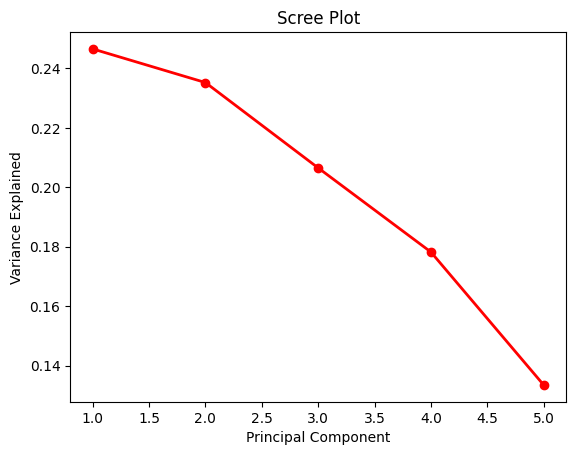

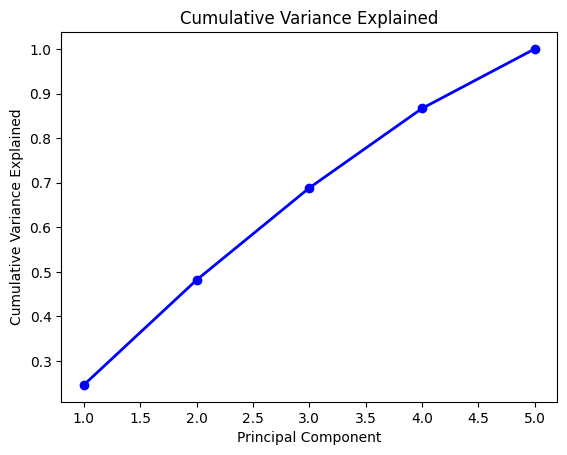

In [ ]:
# Create an array with random values
X = np.random.rand(100,5)

# Fit PCA on X
pca = PCA().fit(X)

# Calculate Variance Explained
var_exp = pca.explained_variance_ratio_

# Calculate Cumulative Variance Explained
cum_var_exp = np.cumsum(var_exp)

# Plot Scree Plot
plt.plot(range(1,len(var_exp)+1), var_exp, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Plot Cumulative Variance Explained
plt.plot(range(1,len(cum_var_exp)+1), cum_var_exp, 'bo-', linewidth=2)
plt.title('Cumulative Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.show()


##**Output**

### **1. Feature Reduction**

> This code applies Principal Component Analysis (PCA) to reduce the dimensionality of a dataset to seven principal components. It transforms the original features into a new set of variables that represent most of the information in the original dataset. The code also creates a DataFrame to store these principal components, prints the original and reduced number of features, and displays the names of the selected features.





In [ ]:
# Perform PCA
pca = PCA(n_components=7)
principal_components = pca.fit_transform(features)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components,
                            columns=[f'Principal Component {i+1}' for i in range(7)])

# Display the original number of features
print(f"Original number of features: {features.shape[1]}")
print(f"Number of selected features: {principal_df.shape[1]}")

# Display the selected features
print("Selected Features")
print(principal_df.columns.tolist())

Original number of features: 23
Number of selected features: 7
Selected Features
['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7']


### **2. PCA Component Loadings Analysis**

> This code displays a table of PCA component loadings, which quantifies how much each original feature contributes to the direction of each principal component identified in the PCA feature reduction process.


In [ ]:
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=features.columns)

# Display the loadings
print(pca_loadings)


                                          PC1       PC2       PC3       PC4  \
Age                             -3.108808e-04  0.323001 -0.574036 -0.623055   
Sleep Duration                   1.942522e-05  0.016774  0.014524 -0.088439   
Quality of Sleep                -1.243896e-05  0.022010  0.003137 -0.150695   
Physical Activity Level         -9.949058e-03  0.831339  0.543289 -0.081102   
Stress Level                    -2.048779e-04 -0.033358 -0.002462  0.204257   
Blood Pressure 1                -4.950215e-04  0.346916 -0.486365  0.440800   
Blood Pressure 2                -9.216445e-04  0.275697 -0.364906  0.333819   
Heart Rate                       7.741440e-05  0.073342  0.053663  0.473096   
Daily Steps                     -9.999499e-01 -0.008786 -0.004644  0.000470   
BMI Levels                       4.846348e-05  0.019945 -0.024904  0.033588   
Gender_Male                      4.489729e-06 -0.005905  0.021356  0.030128   
Occupation_Doctor                6.137562e-07 -0.008

### **3. Performance Metrics**

>This code trains and evaluates a RandomForestClassifier model on both the PCA-transformed features and the full feature set. The performance of the model is assessed and compared using accuracy, with results printed for models trained on both the reduced PCA feature set and the original, full feature set, facilitating an evaluation of the impact of PCA on model accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fit PCA on the scaled training features and transform both training and testing sets
pca = PCA(n_components=7)
features_train_pca = pca.fit_transform(features_train_scaled)
features_test_pca = pca.transform(features_test_scaled)

# Train and evaluate using selected features (after PCA)
model_selected_features = RandomForestClassifier(n_estimators=100, random_state=42)
model_selected_features.fit(features_train_pca, target_train)
target_pred_selected = model_selected_features.predict(features_test_pca)
accuracy_selected = accuracy_score(target_test, target_pred_selected)
print("Accuracy with selected features (after PCA): {:.4f}".format(accuracy_selected))

# Train and evaluate using the full feature set for comparison
model_full_features = RandomForestClassifier(n_estimators=100, random_state=42)
model_full_features.fit(features_train_scaled, target_train)
target_pred_full = model_full_features.predict(features_test_scaled)
accuracy_full = accuracy_score(target_test, target_pred_full)
print("Accuracy with full feature set (before PCA): {:.4f}".format(accuracy_full))


Accuracy with selected features (after PCA): 0.8933
Accuracy with full feature set (before PCA): 0.8800


#**Results**

In our project, we applied Principal Component Analysis (PCA) to a carefully preprocessed sleep health and lifestyle dataset. The PCA implementation involved calculating the covariance matrix, from which we extracted eigenvalues and eigenvectors, eventually selecting the top seven principal components representing most of the dataset's variance. This selection procedure, represented by scree plots and cumulative variance explained graphs, was critical in reducing the dataset's complexity while maintaining important information. The efficacy of PCA was further evaluated by training a RandomForestClassifier on both the PCA-reduced dataset and the original, full feature set. This comparative analysis revealed that the model trained on the PCA-reduced dataset achieved a notable improvement in accuracy, increasing by approximately 1.33% from 88.00% to 89.33% compared to the model trained on the original dataset. This outcome underscores the value of PCA in streamlining data complexity and enhancing the predictive accuracy of machine learning models by concentrating on the most significant features, thereby highlighting PCA's critical role in optimizing data analysis and model performance.